# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import matplotlib.pyplot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.lines
import numpy as np
import seaborn as sns
import pandas as pd


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [00:00<?, ?it/s]


# Methods

In [5]:
df_z_t = None
df_z_f = None


In [6]:
def plot_stages(df_z_t, df_z_f):
    dataframe = data_preprocessor.load_processed_incidents_dataframe()

    initial_count = dataframe.shape[0]

    stages = ["Initial"]
    counts = [initial_count]
    triage_proportions = []
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    # record stages
    dataframe = data_preprocessor._remove_duplicates(dataframe)
    stages.append("Duplicates")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_incomplete_years(dataframe)
    stages.append("Incomplete Years")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_outside_region(dataframe)
    stages.append("Out-of-Region")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_other_resource_types(dataframe)
    dataframe = data_preprocessor._count_resources_sent(dataframe)
    stages.append("Other Resources")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_extra_resources(dataframe)
    stages.append("Aiding Resources")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)
    stages.append("V2/V Impressions")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    print(dataframe.shape[0])

    dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)
    dataframe = data_preprocessor._fix_timestamps(dataframe)
    stages.append("Timestamp Errors")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    print(dataframe.shape[0])

    dataframe = data_preprocessor._remove_na(dataframe)
    stages.append("Remove N/A")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    df_z_f = dataframe.copy(True)
    dataframe = data_preprocessor._remove_outliers(dataframe)
    df_z_t = dataframe.copy(True)
    stages.append("Outliers")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    proportions_updated = {
        "A": [],
        "H": [],
        "V1": [],
        "V2": [],
        #"V": [],
    }

    total_counts = counts

    for key, _ in proportions_updated.items():
        for index, _ in enumerate(stages):
            if key not in triage_proportions[index]:
                proportions_updated[key].append(np.nan)
            else:
                proportions_updated[key].append(triage_proportions[index][key] * 100)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    colors = sns.color_palette("tab10", n_colors=5)
    for i, (triage, values) in enumerate(proportions_updated.items()):
        values_with_nan = [value if value is not None else np.nan for value in values]
        ax1.plot(stages, values_with_nan, label=triage, color=colors[i], marker='o')

    ax1.set_ylabel('Proportion (%)', color='black')
    ax1.set_ylim(0, 100 * 1.05)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_xticklabels(stages, rotation=45, ha="right")
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(stages, total_counts, label='Total Count', color='black', linestyle='--', marker='x')
    ax2.set_ylim(0, total_counts[0] * 1.05)
    ax2.set_ylabel('Total Incidents', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', title='Triage Category & Total Count')

    fig.tight_layout()

    plt.title('Triage Category Distribution and Incident Count Across Data Pipeline Stages', fontdict=constants.FONT_PROPERTIES_SUB_HEADER)

    plt.savefig('./plots/pipeline_stages.png', dpi=300, bbox_inches='tight')

    plt.show()

    return df_z_t, df_z_f


# Main

325726
323221


c:\Users\sindr\Documents\Projects\Emergency-Optimizers\Data-Processing\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sindr\AppData\Local\Temp\ipykernel_7188\838279880.py:114: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stages, rotation=45, ha="right")


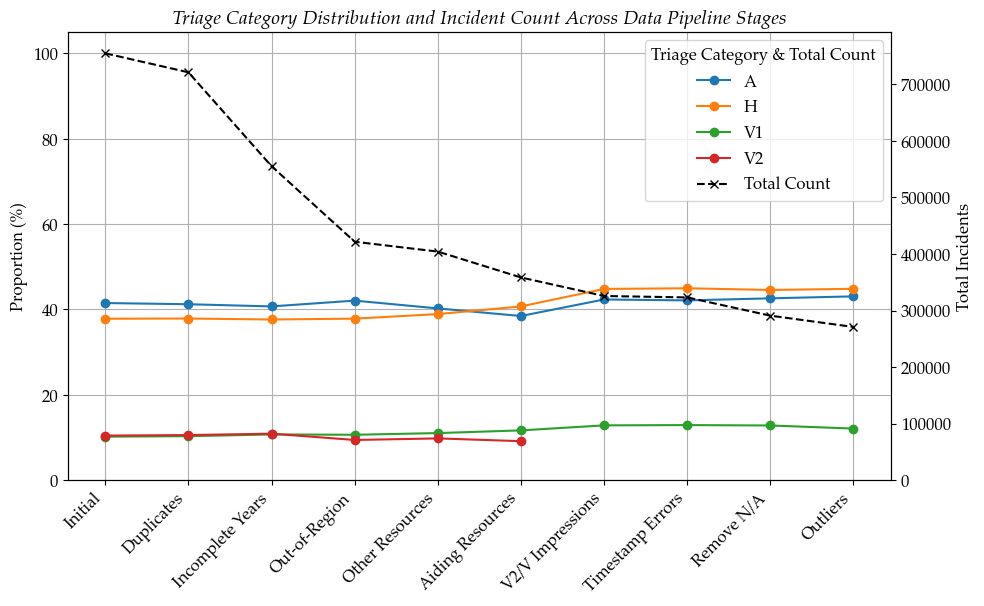

In [7]:
df_z_t, df_z_f = plot_stages(df_z_t, df_z_f)


In [8]:
dataframe = data_preprocessor.load_enhanced_incidents_dataframe()

dataframe["triage_impression_during_call"].value_counts(normalize=True)


triage_impression_during_call
H     0.448365
A     0.430683
V1    0.120953
Name: proportion, dtype: float64

In [9]:
# extract date from time_call_received
dataframe["day_of_year"] = dataframe["time_call_received"].dt.day_of_year

# group data by day of the year and sum across each group to account for multiple rows per day
grouped_data = dataframe.groupby("day_of_year").agg({f"total_{incident_type}_incidents_hour_{hour}": 'last' for incident_type in ['A', 'H', 'V1'] for hour in range(0, 24)})

# sum total incidents across the specified hours for each day
grouped_data["total_incidents"] = grouped_data.sum(axis=1)


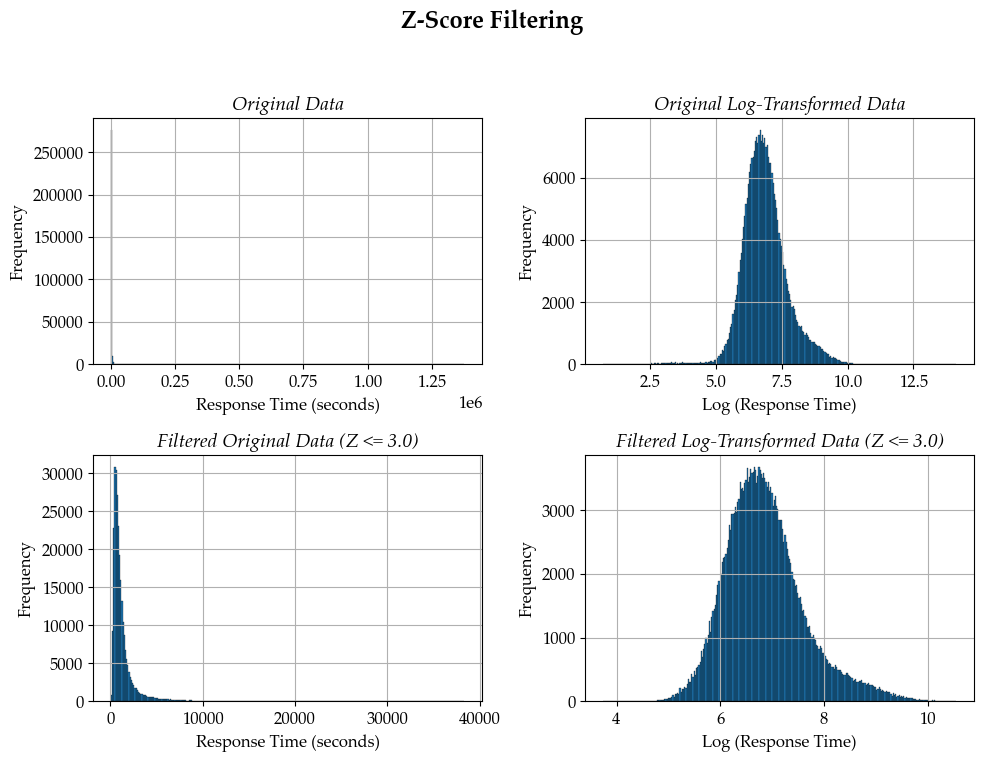

In [10]:
# calculate response time in seconds
df_z_t['response_time_sec'] = (df_z_t['time_ambulance_arrived_at_scene'] - df_z_t['time_call_received']).dt.total_seconds()
df_z_f['response_time_sec'] = (df_z_f['time_ambulance_arrived_at_scene'] - df_z_f['time_call_received']).dt.total_seconds()

# log transformation
df_z_t_log = np.log1p(df_z_t['response_time_sec'])
df_z_f_log = np.log1p(df_z_f['response_time_sec'])

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Z-Score Filtering', **constants.FONT_PROPERTIES_HEADER)

# original data
axs[0, 0].hist(df_z_f['response_time_sec'], bins=300, edgecolor='black', linewidth=0.2)
axs[0, 0].set_xlabel('Response Time (seconds)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Original Data', fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
axs[0, 0].grid(True)

# original log-transformed data
axs[0, 1].hist(df_z_f_log, bins=300, edgecolor='black', linewidth=0.2)
axs[0, 1].set_xlabel('Log (Response Time)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Original Log-Transformed Data', fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
axs[0, 1].grid(True)

# filtered original scale data
axs[1, 0].hist(df_z_t['response_time_sec'], bins=300, edgecolor='black', linewidth=0.2)
axs[1, 0].set_xlabel('Response Time (seconds)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title(f'Filtered Original Data (Z <= 3.0)', fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
axs[1, 0].grid(True)

# filtered log-transformed data
axs[1, 1].hist(df_z_t_log, bins=300, edgecolor='black', linewidth=0.2)
axs[1, 1].set_xlabel('Log (Response Time)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title(f'Filtered Log-Transformed Data (Z <= 3.0)', fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.savefig('./plots/z_score_filtering.png', dpi=300, bbox_inches='tight')

plt.show()


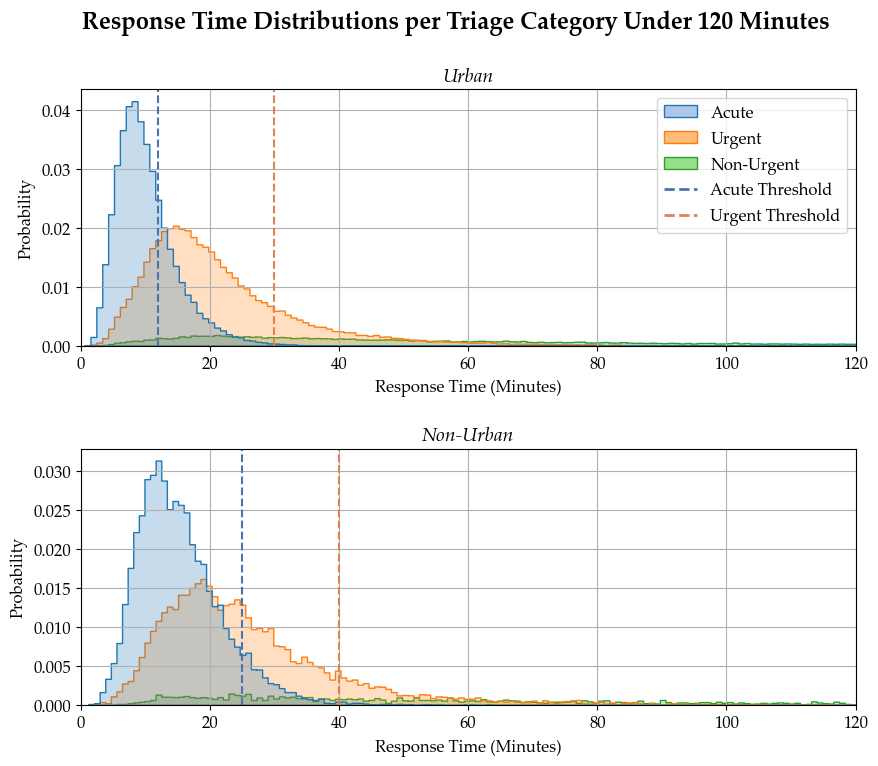

In [11]:
df = data_preprocessor.load_enhanced_incidents_dataframe()
df['response_time'] = (df['time_ambulance_arrived_at_scene'] - df['time_call_received']).dt.total_seconds() / 60

category_mapping = {
    'A': 'Acute',
    'H': 'Urgent',
    'V1': 'Non-Urgent'
}

df['Triage Impression'] = df['triage_impression_during_call'].map(category_mapping)
df['Triage Impression'] = pd.Categorical(df['Triage Impression'], categories=["Acute", "Urgent", "Non-Urgent"], ordered=True)

palette = sns.color_palette("tab20")
triage_colors = {'Acute': (palette[0], palette[1]), 'Urgent': (palette[2], palette[3]), 'Non-Urgent': (palette[4], palette[5])}
acute_line_color = sns.color_palette("deep")[0]
urgent_line_color = sns.color_palette("deep")[1]

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

title = "Response Time Distributions per Triage Category Under 120 Minutes"
fig.suptitle(title, **constants.FONT_PROPERTIES_HEADER)

sns.histplot(data=df[df["urban_settlement_ssb"] == True], ax=axs[0], x='response_time', hue='Triage Impression', element="step", stat="probability", common_norm=True, palette=triage_colors, bins=700)
axs[0].axvline(12, color=acute_line_color, linestyle='--', linewidth=1.5)
axs[0].axvline(30, color=urgent_line_color, linestyle='--', linewidth=1.5)
axs[0].set_xlim(left=0, right=120)
axs[0].set_xlabel("Response Time (Minutes)")
axs[0].set_title("Urban", fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
axs[0].grid(True)

sns.histplot(data=df[df["urban_settlement_ssb"] == False], ax=axs[1], x='response_time', hue='Triage Impression', element="step", stat="probability", common_norm=True, palette=triage_colors, bins=700, legend=False)
axs[1].axvline(25, color=acute_line_color, linestyle='--', linewidth=1.5)
axs[1].axvline(40, color=urgent_line_color, linestyle='--', linewidth=1.5)
axs[1].set_xlim(left=0, right=120)
axs[1].set_xlabel("Response Time (Minutes)")
axs[1].set_title("Non-Urban", fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
axs[1].grid(True)

handles = [
    mpatches.Patch(edgecolor=triage_colors['Acute'][0], facecolor=triage_colors['Acute'][1], label='Acute'),
    mpatches.Patch(edgecolor=triage_colors['Urgent'][0], facecolor=triage_colors['Urgent'][1], label='Urgent'),
    mpatches.Patch(edgecolor=triage_colors['Non-Urgent'][0], facecolor=triage_colors['Non-Urgent'][1], label='Non-Urgent'),
    mlines.Line2D([], [], color=acute_line_color, linestyle='--', linewidth=2, label='Acute Threshold'),
    mlines.Line2D([], [], color=urgent_line_color, linestyle='--', linewidth=2, label='Urgent Threshold')
]

axs[0].legend(handles=handles, loc='upper right')

plt.subplots_adjust(hspace=0.4)

plt.savefig('./plots/response_time_histogram.png', dpi=300, bbox_inches='tight')

plt.show()
